In [9]:
import pandas as pd
import numpy as np
import datetime 
import holidays
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import fbprophet
from sklearn.externals import joblib
from collections import defaultdict
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ll = pd.read_csv('../datasets/tc.csv')
dr = pd.read_csv('../datasets/nights_2010-2017.csv',parse_dates=['date'], index_col='date',usecols=[*range(1, 15)])
regions = ll.Region

In [7]:
train_start = '2010-01-01'
all_mae = defaultdict(dict)
all_rmse = defaultdict(dict)
years_data = defaultdict(dict)
predicted_data = defaultdict(list)
for region in regions:
    for predict_year in range(2011,2018):
        print("Cross Validation Prophet Region:",region,"Prediction year:",predict_year)
        ld = []
        for holiday_year in range(2010,predict_year):
            for date, name in sorted(holidays.FRA(years=holiday_year).items()):
                ld.append(date.strftime('%Y-%m-%d'))
        train_end = str(predict_year-1)+'-12-01'
        predict_start = str(predict_year)+'-01-01'
        predict_end = str(predict_year)+'-12-01'
        dfr = dr.loc[train_start:predict_end,dr.columns.str.contains(""+region+"|daysoff")]
        df_train = dfr.loc[train_start:train_end,dfr.columns.str.startswith('nights')]
        df_test = dfr.loc[predict_start:predict_end ,dfr.columns.str.startswith('nights')]
        train = np.array(df_train)
        test = np.array(df_test)
        #Create & Fit Facebook model
        fb = pd.DataFrame()
        fb['ds'] = df_train.index
        fb['y'] = train
        holidays_exo = pd.DataFrame({  
            'holiday': 'france',
            'ds': pd.to_datetime(ld),
           })
        fb_prophet = fbprophet.Prophet(yearly_seasonality = True, seasonality_mode='multiplicative', seasonality_prior_scale=0.04, changepoint_prior_scale=0.1, holidays=holidays_exo, holidays_prior_scale=0.01)
        fb_prophet.fit(fb)
        fb_forecast = fb_prophet.make_future_dataframe(periods=12, freq='M')
        fb_forecast = fb_prophet.predict(fb_forecast)
        future_forecast= np.array(fb_forecast.tail(12).yhat)
        # --------Calculated error measures for each CV step----------
        mae = mean_absolute_error(test, future_forecast)
        mse = mean_squared_error(test,future_forecast)
        rmse = sqrt(mse)
        years_data[region][predict_year]=df_train.index.strftime('%Y').unique().tolist()
        predicted_data[region].append(predict_year)
        all_mae[region][predict_year]=mae
        all_rmse[region][predict_year]=rmse



INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: ARA Prediction year: 2011


/home/aa/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/aa/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: ARA Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: ARA Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: ARA Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: ARA Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: ARA Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: ARA Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: BFC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: BFC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BFC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BFC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BFC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BFC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BFC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: BRE Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: BRE Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BRE Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BRE Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BRE Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BRE Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: BRE Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: CVL Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: CVL Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: CVL Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: CVL Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: CVL Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: CVL Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: CVL Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: COR Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: COR Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: COR Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: COR Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: COR Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: COR Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: COR Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: IDF Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: IDF Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: IDF Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: IDF Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: IDF Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: IDF Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: IDF Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: NAQ Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: NAQ Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NAQ Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NAQ Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NAQ Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NAQ Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NAQ Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: NOR Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: NOR Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NOR Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NOR Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NOR Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NOR Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: NOR Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: GES Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: GES Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: GES Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: GES Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: GES Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: GES Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: GES Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: HDF Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: HDF Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: HDF Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: HDF Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: HDF Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: HDF Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: HDF Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: OCC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: OCC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: OCC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: OCC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: OCC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: OCC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: OCC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: PAC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: PAC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PAC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PAC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PAC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PAC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PAC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: PDL Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Cross Validation Prophet Region: PDL Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PDL Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PDL Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PDL Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PDL Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cross Validation Prophet Region: PDL Prediction year: 2017


Region ARA
Years of training data: ['2010']
Predicted year: 2011
RMSE: 2457.760794
MAE: 2325.317636
Years of training data: ['2010', '2011']
Predicted year: 2012
RMSE: 141.351277
MAE: 121.475899
Years of training data: ['2010', '2011', '2012']
Predicted year: 2013
RMSE: 94.132082
MAE: 69.637490
Years of training data: ['2010', '2011', '2012', '2013']
Predicted year: 2014
RMSE: 173.101910
MAE: 145.943220
Years of training data: ['2010', '2011', '2012', '2013', '2014']
Predicted year: 2015
RMSE: 137.082437
MAE: 123.065891
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015']
Predicted year: 2016
RMSE: 86.227109
MAE: 63.599817
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
Predicted year: 2017
RMSE: 74.533706
MAE: 58.744015
Region BFC
Years of training data: ['2010']
Predicted year: 2011
RMSE: 192.840499
MAE: 158.519593
Years of training data: ['2010', '2011']
Predicted year: 2012
RMSE: 93.218875
MAE: 76.128312
Years of training data: [

Region PAC
Years of training data: ['2010']
Predicted year: 2011
RMSE: 808.530786
MAE: 704.328653
Years of training data: ['2010', '2011']
Predicted year: 2012
RMSE: 715.860200
MAE: 621.148483
Years of training data: ['2010', '2011', '2012']
Predicted year: 2013
RMSE: 667.567033
MAE: 595.257534
Years of training data: ['2010', '2011', '2012', '2013']
Predicted year: 2014
RMSE: 536.260838
MAE: 448.343524
Years of training data: ['2010', '2011', '2012', '2013', '2014']
Predicted year: 2015
RMSE: 124.608585
MAE: 102.787378
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015']
Predicted year: 2016
RMSE: 129.366795
MAE: 97.560610
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
Predicted year: 2017
RMSE: 159.693938
MAE: 132.325928
Region PDL
Years of training data: ['2010']
Predicted year: 2011
RMSE: 130.115624
MAE: 110.395408
Years of training data: ['2010', '2011']
Predicted year: 2012
RMSE: 44.662319
MAE: 39.707885
Years of training data

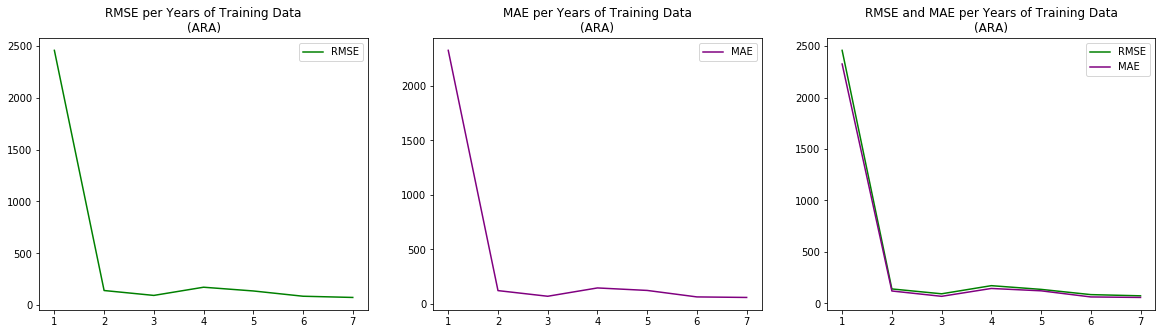

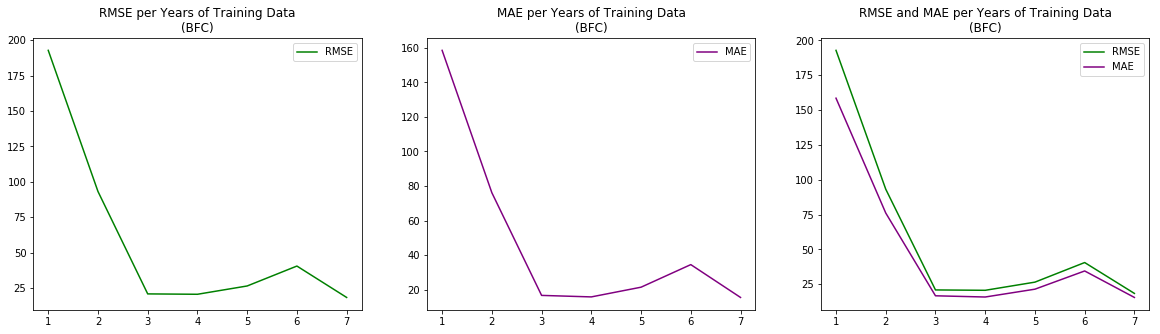

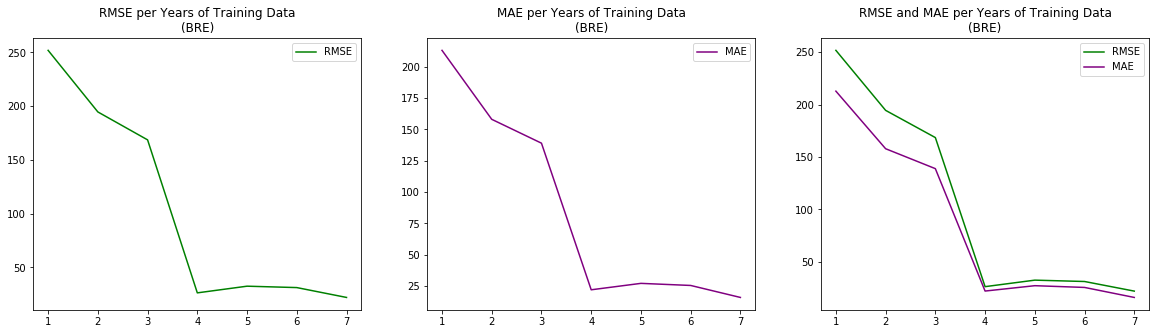

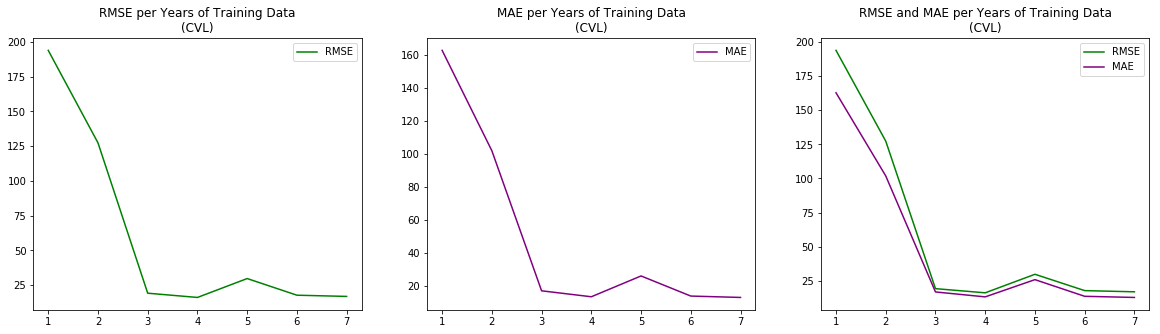

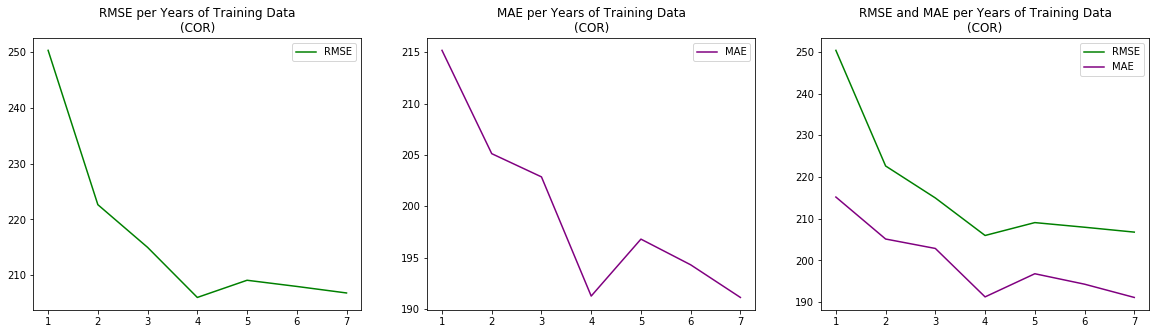

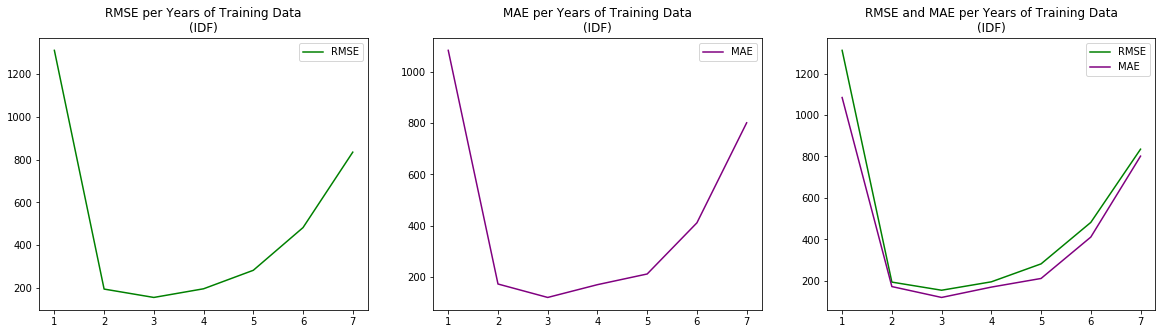

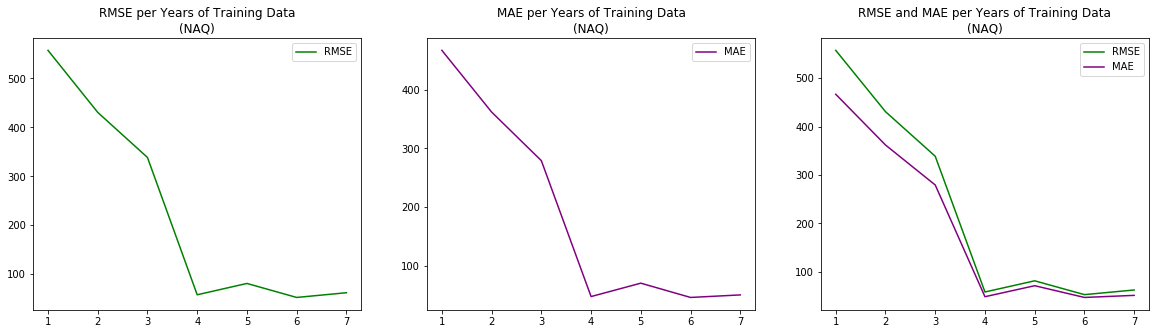

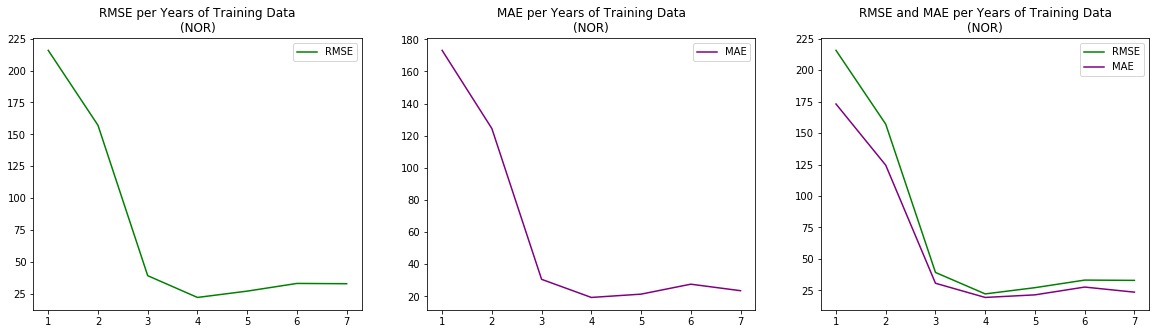

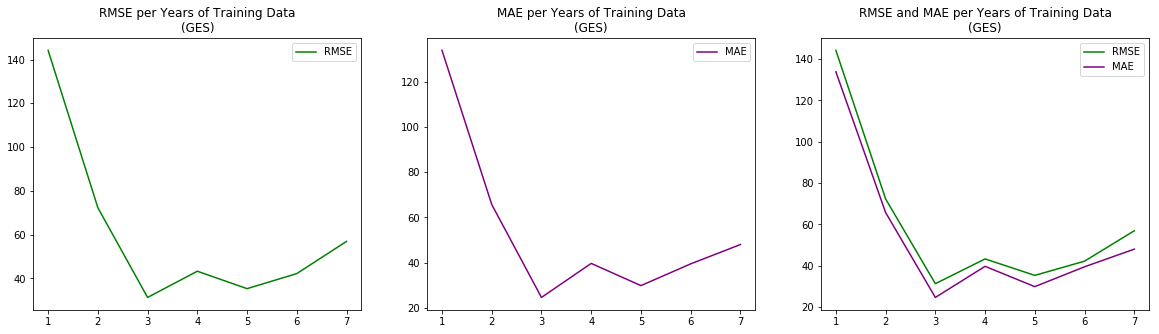

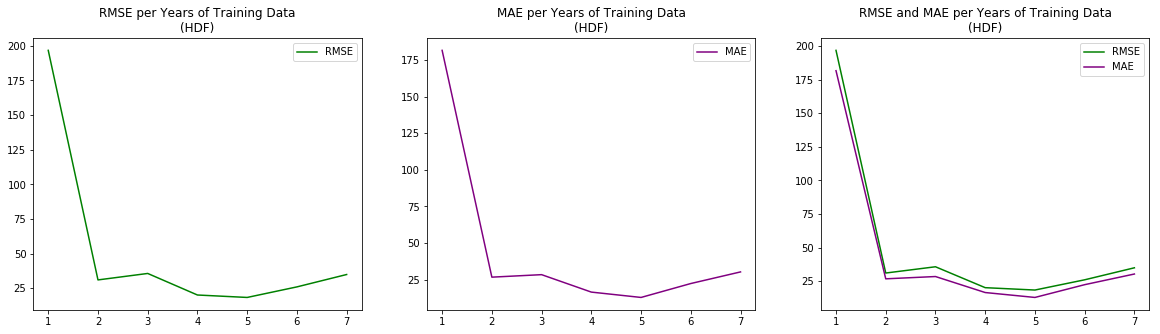

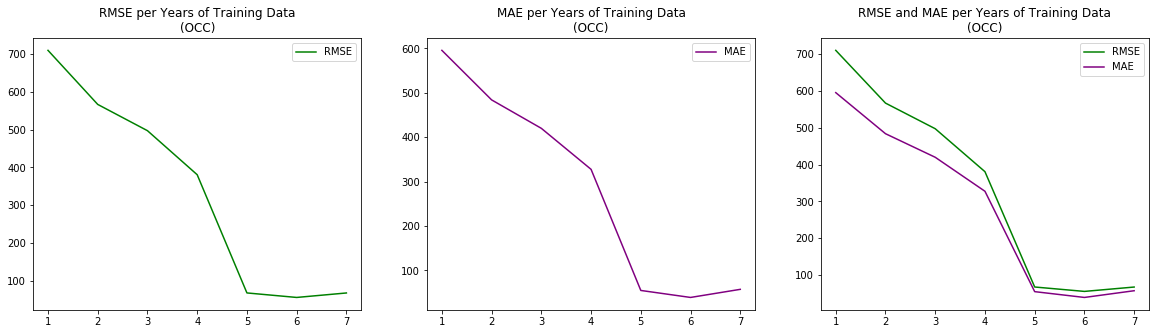

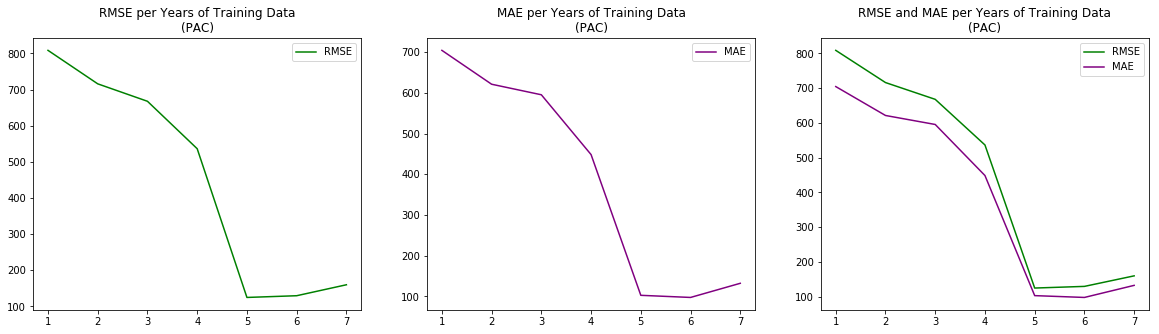

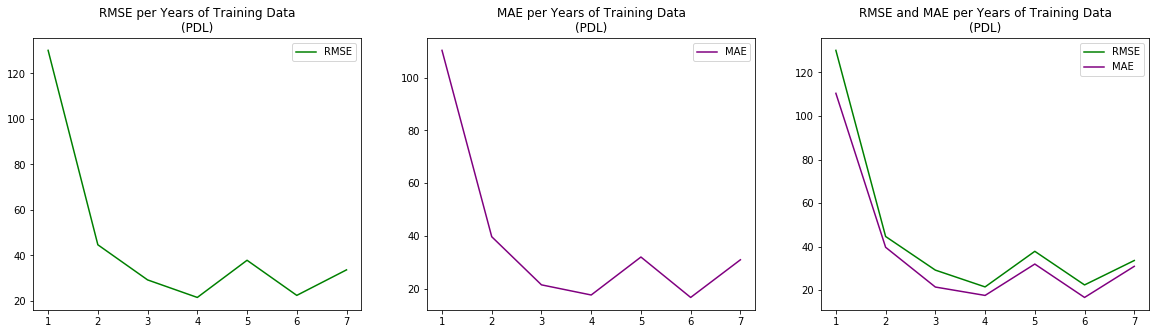

In [10]:
for region in regions:
        print("Region",region)
        for year in predicted_data[region]:
            print('Years of training data:', years_data[region][year])
            print('Predicted year:', year)
            print('RMSE: %f' % all_rmse[region][year])
            print('MAE: %f' % all_mae[region][year])

        # Error measures per CrossVal loop (number of years of training data used)
        years = predicted_data[region]    
        fig, axes = plt.subplots(1,3, figsize=(20,5))
        x = [len(v) for k,v in years_data[region].items()]
        axes[0].plot(x, np.array([all_rmse[region][index] for index in years]), label='RMSE', color='green')
        axes[0].set_xticks(x)
        axes[0].set_xticklabels(x)
        axes[0].set_title('RMSE per Years of Training Data' + '\n' + f'({region})')
        axes[0].legend()

        axes[1].plot(x, [all_mae[region][index] for index in years], label='MAE', color='purple')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(x)
        axes[1].set_title('MAE per Years of Training Data' + '\n' + f'({region})')
        axes[1].legend()

        axes[2].plot(x, [all_rmse[region][index] for index in years], label='RMSE', color='green')
        axes[2].plot(x, [all_mae[region][index] for index in years], label='MAE', color='purple')
        axes[2].set_xticks(x)
        axes[2].set_xticklabels(x)
        axes[2].set_title('RMSE and MAE per Years of Training Data' + '\n' + f'({region})')
        axes[2].legend();   
        plt.savefig('CrossValidation_Prophet'+region+'.png')